In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.drop(columns=['Serial No.'])

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
for i in df.columns:
    print(i+':','\n', df[i].unique(), '\n')

GRE Score: 
 [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293] 

TOEFL Score: 
 [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92] 

University Rating: 
 [4 3 2 5 1] 

SOP: 
 [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5] 

LOR : 
 [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ] 

CGPA: 
 [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 

From this we can see that
gre score, toefl score, cgpa, chance of admit are perfectly - numeric
data type university rating SOP LOR and research - category data type.

In [10]:
df = df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'})
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [11]:
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']
numeric_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

### Outlier Treatment

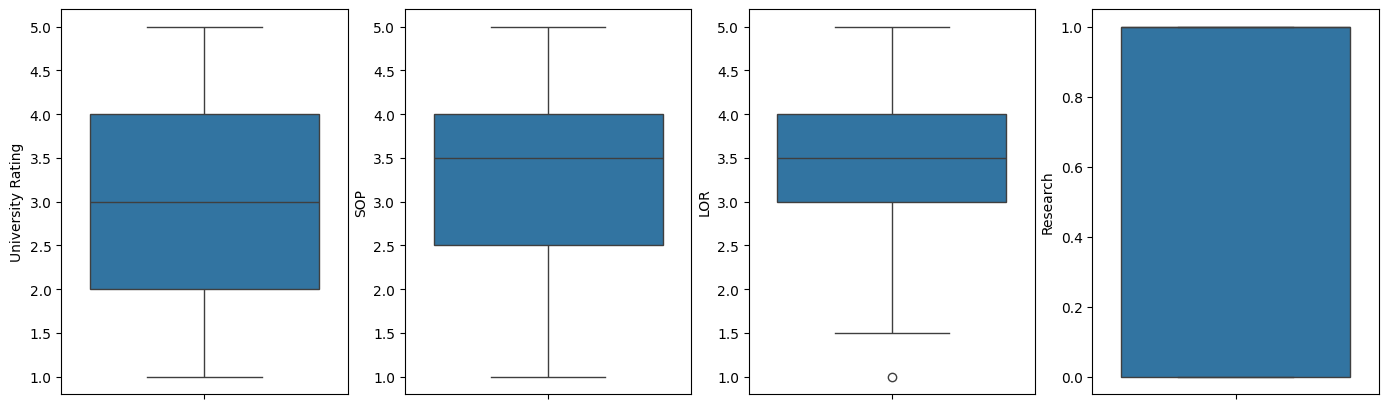

In [12]:
j = 1
plt.figure(figsize=(17,5))
for i in ['University Rating', 'SOP', 'LOR','Research']:
    plt.subplot(1,4,j)
    sns.boxplot(y= df[i])
    j += 1

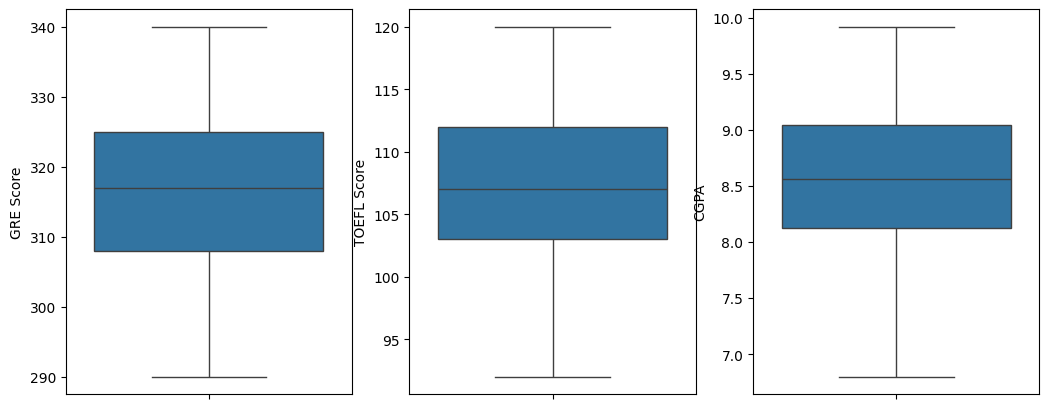

In [13]:
y = 1
plt.figure(figsize=(17,5))
for i in ['GRE Score', 'TOEFL Score','CGPA']:
    plt.subplot(1,4,y)
    sns.boxplot(y = df[i])
    y += 1

In [14]:
numeric_cols.remove('Chance of Admit')
x = df[numeric_cols + cat_cols]
y = df[['Chance of Admit']]

In [15]:
x.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
0,337,118,9.65,4,4.5,4.5,1
1,324,107,8.87,4,4.0,4.5,1
2,316,104,8.00,3,3.0,3.5,1
3,322,110,8.67,3,3.5,2.5,1
4,314,103,8.21,2,2.0,3.0,0


In [16]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [17]:
df1 = df[['University Rating', 'SOP', 'LOR','Research','GRE Score', 'TOEFL Score','CGPA','Chance of Admit']]
df1

,University Rating,SOP,LOR,Research,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,4,4.5,4.5,1,337,118,9.65,0.92
1,4,4.0,4.5,1,324,107,8.87,0.76
2,3,3.0,3.5,1,316,104,8.00,0.72
3,3,3.5,2.5,1,322,110,8.67,0.80
4,2,2.0,3.0,0,314,103,8.21,0.65
...,...,...,...,...,...,...,...,...
495,5,4.5,4.0,1,332,108,9.02,0.87
496,5,5.0,5.0,1,337,117,9.87,0.96
497,5,4.5,5.0,1,330,120,9.56,0.93
498,4,4.0,5.0,0,312,103,8.43,0.73


In [18]:
le = LabelEncoder()
df1['University Rating'] = le.fit_transform(df['University Rating'])
df1['SOP'] = le.fit_transform(df['SOP'])
df1['LOR'] = le.fit_transform(df['LOR'])
df1

,University Rating,SOP,LOR,Research,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,3,7,7,1,337,118,9.65,0.92
1,3,6,7,1,324,107,8.87,0.76
2,2,4,5,1,316,104,8.00,0.72
3,2,5,3,1,322,110,8.67,0.80
4,1,2,4,0,314,103,8.21,0.65
...,...,...,...,...,...,...,...,...
495,4,7,6,1,332,108,9.02,0.87
496,4,8,8,1,337,117,9.87,0.96
497,4,7,8,1,330,120,9.56,0.93
498,3,6,8,0,312,103,8.43,0.73


In [19]:
minmax_trans = MinMaxScaler()
minmax_trans.fit(df1)
scalerd_feature = minmax_trans.transform(df1)
df2 = pd.DataFrame(data=scalerd_feature, columns=['University Rating', 'SOP', 'LOR', 'Research', 'GRE Score',
       'TOEFL Score', 'CGPA', 'Chance of Admit'])
df2

,University Rating,SOP,LOR,Research,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,0.75,0.875,0.875,1.0,0.94,0.928571,0.913462,0.920635
1,0.75,0.750,0.875,1.0,0.68,0.535714,0.663462,0.666667
2,0.50,0.500,0.625,1.0,0.52,0.428571,0.384615,0.603175
3,0.50,0.625,0.375,1.0,0.64,0.642857,0.599359,0.730159
4,0.25,0.250,0.500,0.0,0.48,0.392857,0.451923,0.492063
...,...,...,...,...,...,...,...,...
495,1.00,0.875,0.750,1.0,0.84,0.571429,0.711538,0.841270
496,1.00,1.000,1.000,1.0,0.94,0.892857,0.983974,0.984127
497,1.00,0.875,1.000,1.0,0.80,1.000000,0.884615,0.936508
498,0.75,0.750,1.000,0.0,0.44,0.392857,0.522436,0.619048


In [20]:
x = df2[['University Rating', 'SOP', 'LOR', 'Research', 'GRE Score','TOEFL Score', 'CGPA']]
y = df2['Chance of Admit']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


In [21]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8208741703103732

In [22]:
dic = {}
for i, j in zip(model.coef_, ['University Rating', 'SOP', 'LOR', 'Research', 'GRE Score','TOEFL Score', 'CGPA']):
    dic[j] = np.abs(i)

a = sorted(dic.items(), key=lambda kv: (kv[1], kv[0]))
for i in a:
  print(i)

('SOP', 0.019079851592408548)
('Research', 0.031571077941563525)
('University Rating', 0.03891337690960997)
('LOR', 0.09159876660812981)
('TOEFL Score', 0.14106351937316397)
('GRE Score', 0.14541620599466476)
('CGPA', 0.5779641114318917)


In [23]:
scaler = StandardScaler()
x_tr_scaled = scaler.fit_transform(x_train)

x_sm = sm.add_constant(x_train)
model = sm.OLS(y_train, x_sm)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          2.10e-142
Time:                        20:48:24   Log-Likelihood:                 374.46
No. Observations:                 400   AIC:                            -732.9
Df Residuals:                     392   BIC:                            -701.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0187      0.01

In [24]:
df3 = df2[['SOP','University Rating', 'LOR', 'Research', 'GRE Score','TOEFL Score', 'CGPA']]

vif0 = pd.DataFrame()
x_t = pd.DataFrame(x_tr_scaled, columns=x_train.columns)
vif0['features'] = x_t.columns
vif0['VIF'] = [vif(x_t.values, i) for i in range(x_t.shape[1])]
vif0['VIF'] = round(vif0['VIF'], 2)
vif0 = vif0.sort_values(by = 'VIF', ascending=False)
vif0

,features,VIF
4,GRE Score,4.88
6,CGPA,4.75
5,TOEFL Score,4.26
1,SOP,2.92
0,University Rating,2.80
2,LOR,2.08
3,Research,1.51


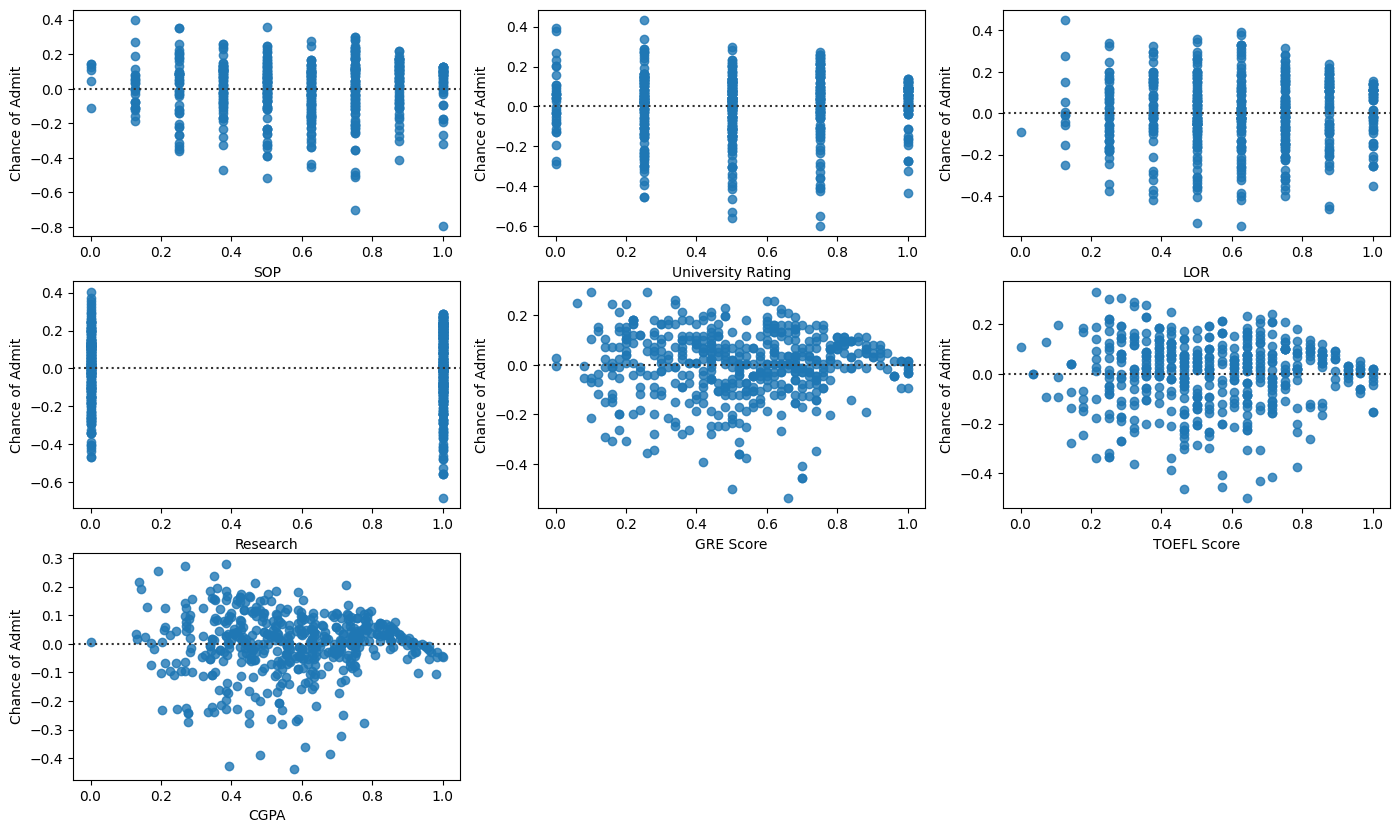

In [25]:
count = 1
plt.figure(figsize=(17,10))
for i in df3.columns:
  plt.subplot(3,3,count)
  sns.residplot(x = df3[i], y= df2['Chance of Admit'])
  count += 1

In [26]:
residuals = y_test.values - y_pred
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.009058079982908411


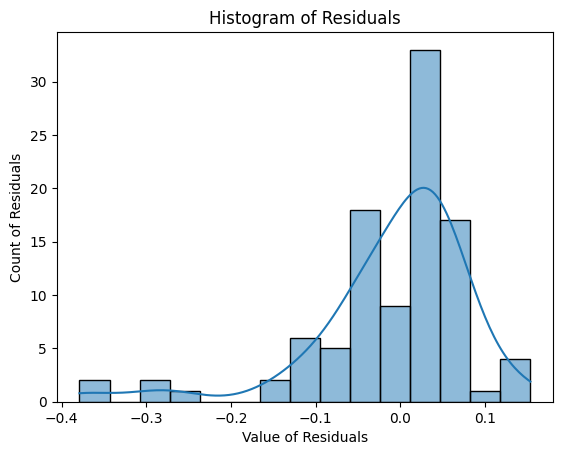

In [27]:
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show();

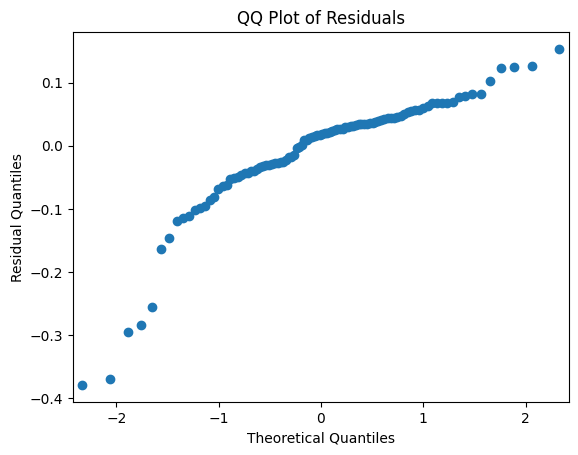

In [28]:
sm.qqplot(residuals.reshape((-1,)))
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show();

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8215099192361265

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8208741703103732